In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

## Regresión logistica

In [46]:
classifierData = pd.read_csv("./Data/Tidy/classifierData.csv")
X = classifierData.drop("ATL", axis=1)
y = classifierData["ATL"]

In [47]:
model = LogisticRegression()
rfe = RFE(model, 3)
X_rfe = rfe.fit_transform(X, y)  
model.fit(X_rfe, y)
rfe.support_

/home/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  
/home/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  
/home/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  


array([False,  True,  True,  True])

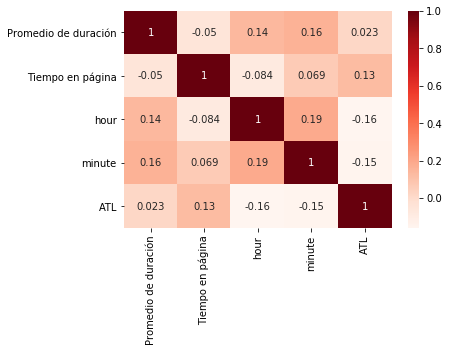

In [48]:
plt.figure()
cor = classifierData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
X.drop("Promedio de duración", axis=1,    inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [50]:
np.random.seed(47)
os = SMOTE(kind='regular',k_neighbors=2)
X_train, y_train = os.fit_sample(X_train, y_train)

In [52]:
log = sm.Logit(y_train, X_train)
result = log.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.495441
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.285     
Dependent Variable: y                AIC:              136.7964  
Date:               2019-08-06 02:10 BIC:              145.4448  
No. Observations:   132              Log-Likelihood:   -65.398   
Df Model:           2                LL-Null:          -91.495   
Df Residuals:       129              LLR p-value:      4.6358e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.1332      0.0313     4.2617    0.0000     0.0720     0.1945
x2    -0.6641      0.1992    -3.3336    0.0009    -1.0545    -0.2736
x3    -0.0648      0.0176    -3.6705    0.0002    -0.0994    -0.0302
=================================================================

"""

## Campañas exitosas

In [28]:
campaignData = pd.read_csv("./Data/Tidy/campaignData.csv")
X = campaignData.drop(["Campaña", "Asistente", "Medio", "source", "Exitosa"], axis=1).values
y = campaignData["Exitosa"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
campaignData.head()

,Campaña,Grupo,Asistente,Número objetivo de conversión,Medio,source,Exitosa
0,Toma Más,5,1,413,3,2,0
1,La mejor,4,1,303,3,3,0
2,Toma Más,4,2,433,3,5,0
3,Lo que te hace falta,1,2,152,1,4,1
4,La mejor,2,4,389,3,2,0


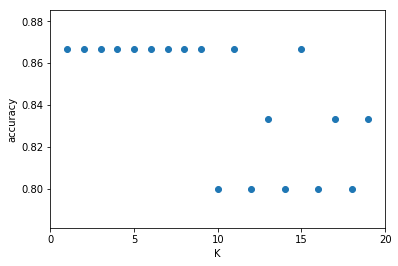

In [35]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('K')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [36]:
h = .02
K = 5
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933'])
clf = KNeighborsClassifier(K, weights='distance')
clf.fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

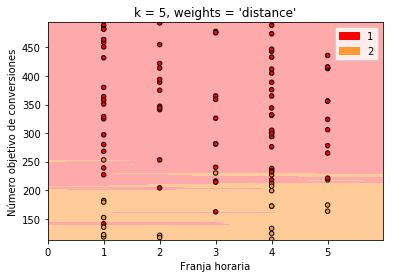

In [37]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
plt.legend(handles=[patch0, patch1])
plt.xlabel('Franja horaria')
plt.ylabel('Número objetivo de conversiones')
plt.title("k = %i, weights = '%s'"  % (K, 'distance'))
plt.show()